# Linear Regression

# Bài tập 1 kỹ thuật đọc và xử lý dữ liệu từ file .csv

In [ ]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random
def get_column(data, index):
    # your code here ****************************
    result = []
    for i in range(len(data)):
        result.append(data[i][index])
    # ********************************************
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()
    N = len(data)

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

## Question 1

In [ ]:
# https://drive.google.com/file/d/13TmEvFzzR05yTkWiVjAwnzidKLiMDnBE/view?usp=drive_link
%cd /content/drive/MyDrive/Colab Notebooks/MODULE04/data
!gdown 13TmEvFzzR05yTkWiVjAwnzidKLiMDnBE
%cd ..

/content/drive/MyDrive/Colab Notebooks/MODULE04/data
Downloading...
From: https://drive.google.com/uc?id=13TmEvFzzR05yTkWiVjAwnzidKLiMDnBE
To: /content/drive/MyDrive/Colab Notebooks/MODULE04/data/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.6MB/s]
/content/drive/MyDrive/Colab Notebooks/MODULE04


In [ ]:
X,y = prepare_data ('data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Bài tập 2 (kỹ thuật huấn luyện data dùng one sample - linear regression):
Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆ y − y)2.


##2.1 Hoàn thành function initialize_params() để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) và b = 0. Ở bước này các bạn có thể dùng hàm sau để khởi tạo bốn tham số trên.

In [ ]:
def initialize_params():
    #w1 = random.gauss(mu =0.0, sigma =0.01)
    #w2 = random.gauss(mu =0.0, sigma =0.01)
    #w3 = random.gauss(mu =0.0, sigma =0.01)
    #b = 0
    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

## 2.2 Hoàn thành function predict(x1, x2, x3, w1, w2, w3, b) để trả về kết quả dự đoán y tương ứng

In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    # your code here ****************************
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

## Question 2

In [ ]:
y = predict(x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5 , w3 =0, b =0.5)
print(y)

1.0


## 2.3 Hoàn thành function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

In [ ]:
# MSE loss
def compute_loss_mse(y_hat, y):
    # your code here ****************************
    loss = (y_hat - y)**2
    return loss

# MAE loss
def compute_loss_mae(y_hat, y):
    # your code here ****************************
    loss = abs(y_hat - y)
    return loss


## Question 3

In [ ]:
l = compute_loss_mse(y_hat =1, y =0.5)
print(l)

0.25


## 2.4 Hoàn thành function compute_gradient_wi(xi, y, y_hat)) để tính đạo hàm của hàm loss L = (ˆ y − y)2 theo wi và function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss L = (ˆ y − y)2 theo b.

In [ ]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    # your code here ****************************
    dl_dwi = 2*(y_hat - y)*xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    # your code here ****************************
    dl_db = 2*(y_hat - y)
    return dl_db

## Question 4

In [ ]:
g_wi = compute_gradient_wi(xi =1.0, y=1.0, y_hat =0.5)
print(g_wi)

-1.0


## Question 5

In [ ]:
g_b = compute_gradient_b(y=2.0, y_hat =0.5)
print(g_b)

-3.0


## 2.5 Hoàn thành function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.

In [ ]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    # your code here ****************************
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    # your code here ****************************
    b = b - lr*dl_db
    return b

## Question 6

In [ ]:
after_wi = update_weight_wi(wi =1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

1.000005


## Question 7

In [ ]:
after_b = update_weight_b(b=0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)
#print(after_wi)

0.50001


In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    #0.00001
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range (N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return(w1, w2, w3, b, losses)

## 2.6 Thực hiện huấn luyện data bằng cách gọi hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên) như bên hình 3.

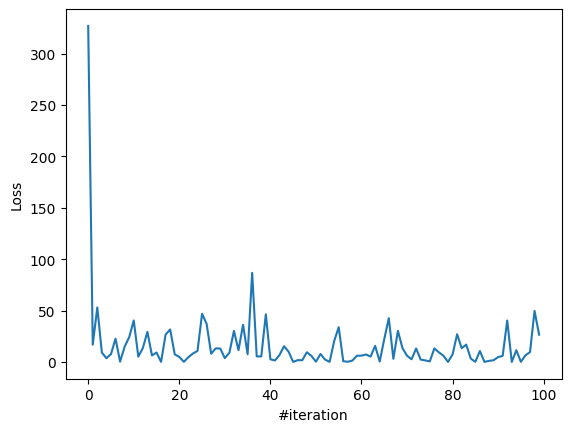

In [ ]:
# Kết quả loss MSE sau 100 iterations
X,y = prepare_data ('data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

## Question 8

In [ ]:
X,y = prepare_data ('data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
print (w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


## Question 9

In [ ]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data ('data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


## 2.7 Thực hiện huấn luyện data bằng cách thay thế hàm loss L = (y^ − y)2 bằng hàm loss MAE L = |yˆ − y| và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên

## Question 10

In [ ]:
l = compute_loss_mae(y_hat =1, y =0.5)
print(l)

0.5


# Bài tập 3 Kỹ thuật huấn luyện data dùng batch N samples - linear regression
Cải tiến giải thuật ở bài tập 2, bằng cách huấn luyện giải thuật linear regression sử dụng N samples-training.

Công việc của bạn ở bài tập này là bạn cần implement lại function implement_linear_regression_nsamples sử dụng
N sample-training với MSE loss function và MAE loss function (optional)

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            # your code here **************
            loss_total += loss

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2 , w3 , b
            # your code here **************
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        # after processing N samples - update parameters
        # your code here *************
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)
        # logging
        losses.append(loss_total/N)
    return(w1, w2, w3, b, losses)

# Thực thi đoạn code bên dưới để hiển thị kết quả huấn luyện sử dụng kỹ thuật N-sample training với loss function MSE và epoches = 1000.

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

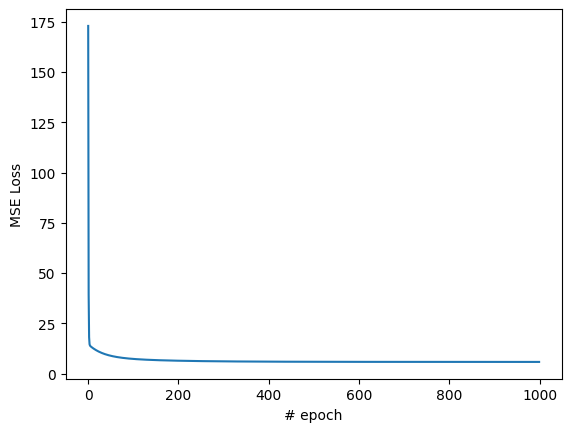

In [ ]:
# Kết quả MSE loss sau 1000 epoches sử dung N-sample training
(w1, w2, w3, b, losses)= implement_linear_regression_nsamples(X, y, epoch_max =1000, lr =1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

## Question 11

In [ ]:
X,y = prepare_data ('data/advertising.csv')
# using MSE loss
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1 ,w2 ,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Bài tập 4 Như chúng ta đã biết, mục đích của linear regression là tìm hàm xấp xỉ y = ax1 + bx2 + cx3 + bx0. Trong đó x1 là TV, x2 là Radio, x3 là Newspapers, và x0 = 1. Đầu tiên, bạn cần tổ chức lại dữ liệu đầu vào ở bài tập 1 theo dạng danh sách các feature (x0, x1, x2, x3). Ví dụ theo hình 1, dữ liệu đầu vào dòng thứ 1 và 2 ta có thể tổ chức lại như sau:
X[0] = [1, x1, x2, x3] = [1, 230.1, 37.8, 69.2]

X[1] = [1, x1, x2, x3] = [1, 44.5, 39.3, 45.1]

....

X[199] = [1, x1, x2, x3] = [1, 232.1, 8.6, 8,7]

In [ ]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    # get tv (index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y

In [ ]:
# khởi tạo danh sách weights ban đầu chứa các giá trị bias, w1, w2, w3
def initialize_params():
    bias = 0
    w1 = random.gauss(mu =0.0, sigma =0.01)
    w2 = random.gauss(mu =0.0, sigma =0.01)
    w3 = random.gauss(mu =0.0, sigma =0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return [bias , w1 , w2 , w3]

In [ ]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    # your code here ......
    result = 0
    for i in range(len(X_features)):
        result += X_features[i]*weights[i]
    return result

def compute_loss(y_hat, y):
    return(y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    # your code here ......
    dl_dweights = [2*(y_hat - y)*xi for xi in X_features]
    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
    # your code here ......
    weights = [w - lr*dl_dweights for w, dl_dweights in zip(weights, dl_dweights)]
    return weights

In [ ]:
# train
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dweights = compute_gradient_w( features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights , losses

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/MODULE04


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


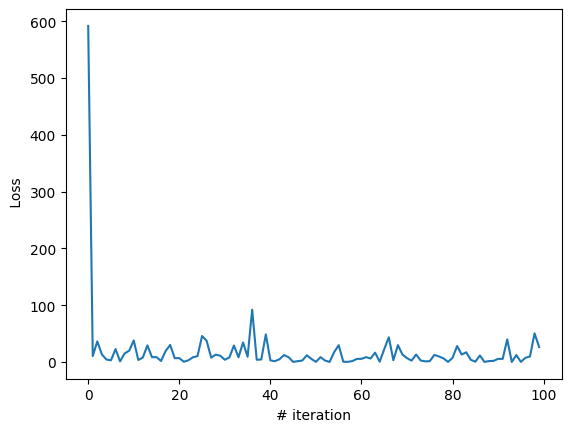

In [ ]:
X,y = prepare_data('data/advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("# iteration")
plt.ylabel(" Loss")
plt.show()

## Question 12

In [ ]:
X,y = prepare_data('data/advertising.csv')
W,L = implement_linear_regression(X, y, epoch_max=50, lr =1e-5)

# Print loss value at iteration 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
